# Linear Mixed Effects Models in R

In this notebook, we'll explore how to use linear mixed effects models (LMMs) in R. LMMs are used when we have data with both fixed and random effects.

## Introduction to Linear Mixed Effects Models

Linear mixed effects models are an extension of linear regression that allow for the modeling of both fixed and random effects. Fixed effects are typically the parameters of interest, while random effects account for variability within groups or clusters.

### Libraries

Before we begin, let's load the necessary libraries:



In [1]:
require(lme4, quietly = TRUE)      # For fitting linear mixed effects models
require(lmerTest, quietly = TRUE)  # For model p-values
require(ggplot2, quietly = TRUE)   # For data visualization
require(tidyverse, quietly = TRUE) # For data manipulation


Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
EEE_data <- read_csv('https://raw.githubusercontent.com/ben-g-1/Psyc178/main/pilot_clean.csv')

EEE_data$highcue_indx <- factor(EEE_data$highcue_indx)
EEE_data$val_type <- factor(EEE_data$val_type)
EEE_data$subj <- factor(EEE_data$subj)
EEE_data$trial <- num(EEE_data$trial)
EEE_data$Image <- factor(EEE_data$Image)
EEE_data$highcue_indx <- factor(EEE_data$highcue_indx,
                                levels = c(-1,1),
                                labels = c('Low Cue', 'High Cue'))
EEE_data$group <- factor(EEE_data$group)
EEE_data$Pair <- factor(EEE_data$Pair)




head(EEE_data)


Rows: 7872 Columns: 45
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Theme, Category, Source
dbl (42): subj, group, trial, highcue_indx, img_rate, exp_rate, val_type, cu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


subj,group,trial,highcue_indx,img_rate,exp_rate,val_type,cue_observed_std,cue_value_1,cue_value_2,⋯,Valence_mean_women,Valence_SD_women,Valence_N_women,Arousal_mean_men,Arousal_SD_men,Arousal_N_men,Arousal_mean_women,Arousal_SD_women,Arousal_N_women,Valence_gender_difference
<fct>,<fct>,<num>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,1,1,Low Cue,60,55,1,9.370816,58.08311,46.65535,⋯,78.29457,19.76545,43,44.55782,27.08606,49,44.96855,24.80370,53,6.4554932
3,1,2,Low Cue,55,50,1,8.068631,41.25959,55.65268,⋯,68.62745,22.27282,51,47.95918,27.77069,49,63.03030,26.58377,55,0.2063984
3,1,3,High Cue,40,45,3,13.638562,53.85315,48.16503,⋯,25.59524,14.20068,56,40.81633,28.27224,49,40.38462,27.28574,52,1.4417989
3,1,4,Low Cue,70,65,1,13.573728,70.97096,89.56748,⋯,84.96732,15.72503,51,41.83673,27.66417,49,41.81818,26.81148,55,5.1427589
3,1,5,High Cue,95,90,1,5.583210,92.80905,98.23677,⋯,92.63566,11.67365,43,60.20408,24.48930,49,64.15094,31.58834,53,5.5666934
3,1,6,Low Cue,50,35,2,8.707814,37.72575,35.12892,⋯,50.57471,10.33810,58,11.34752,19.69158,47,10.57692,19.53402,52,0.1959248


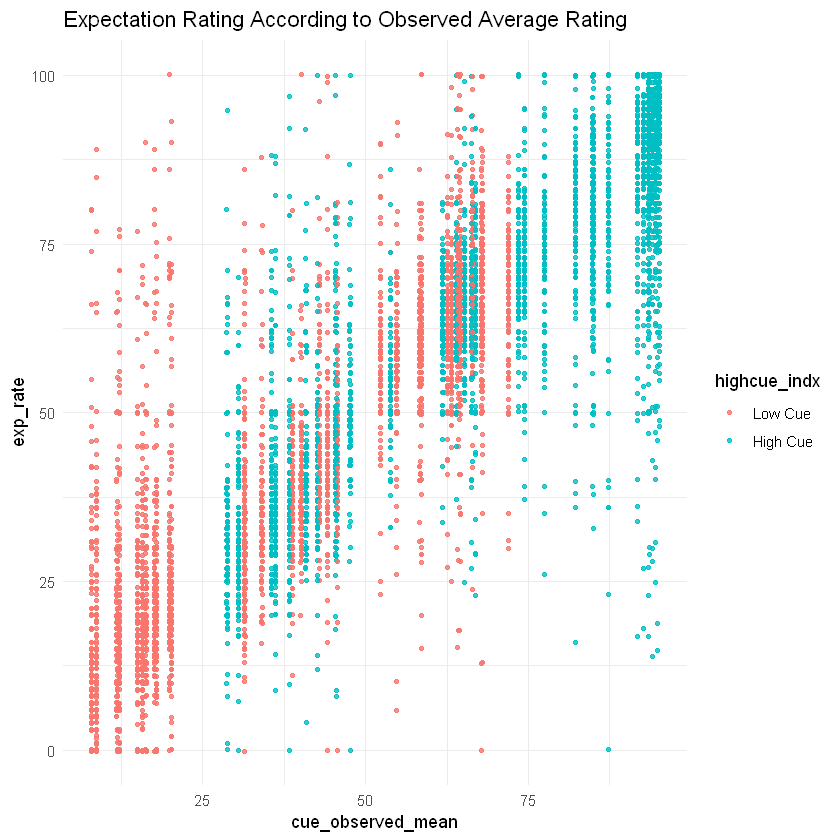

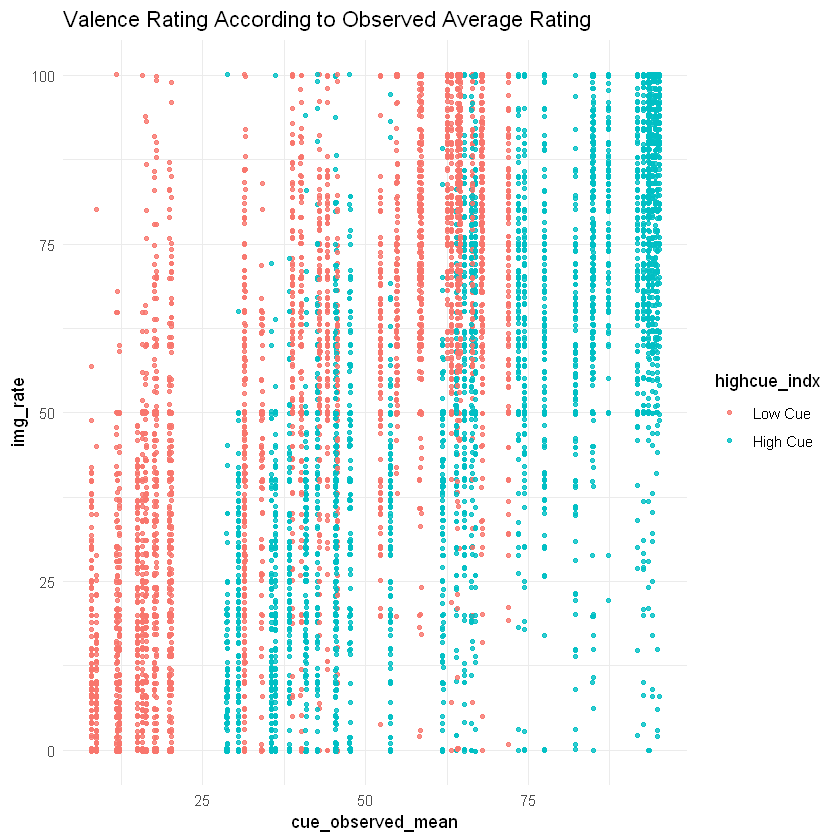

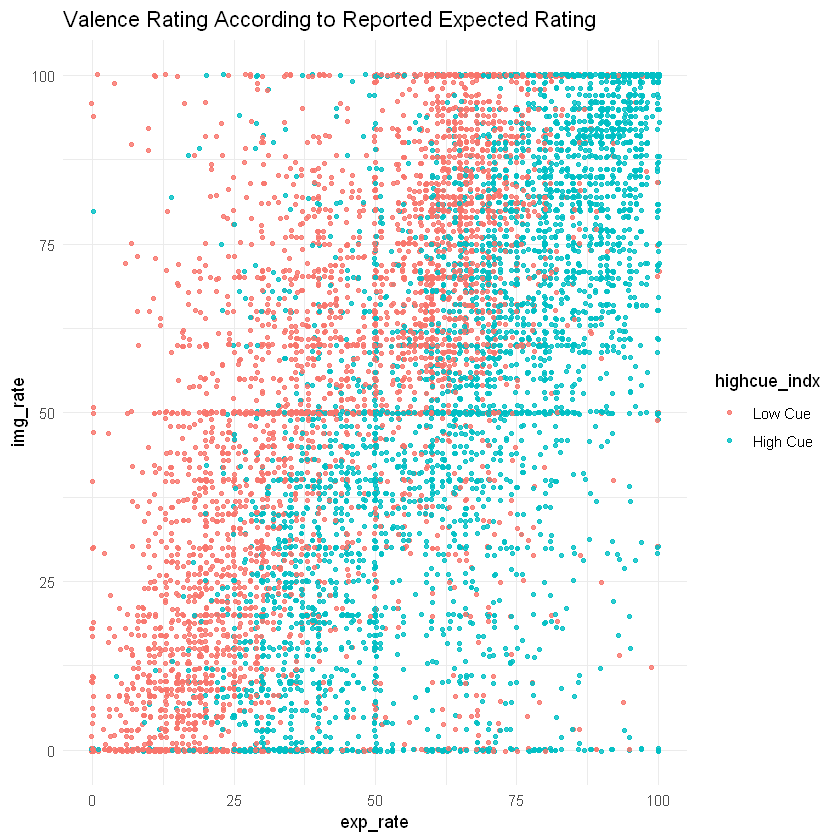

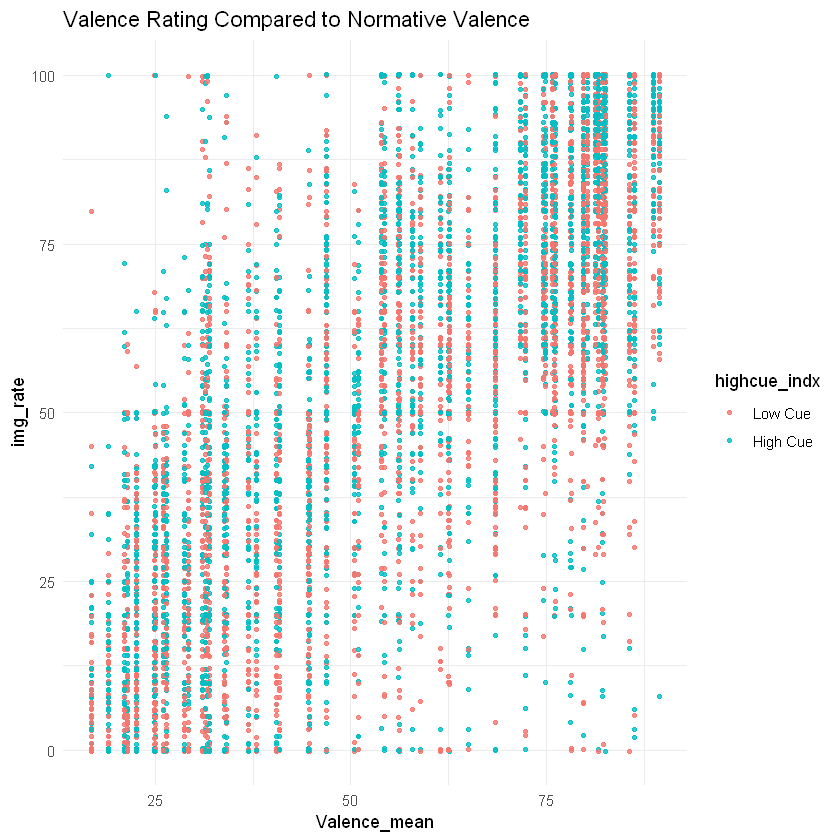

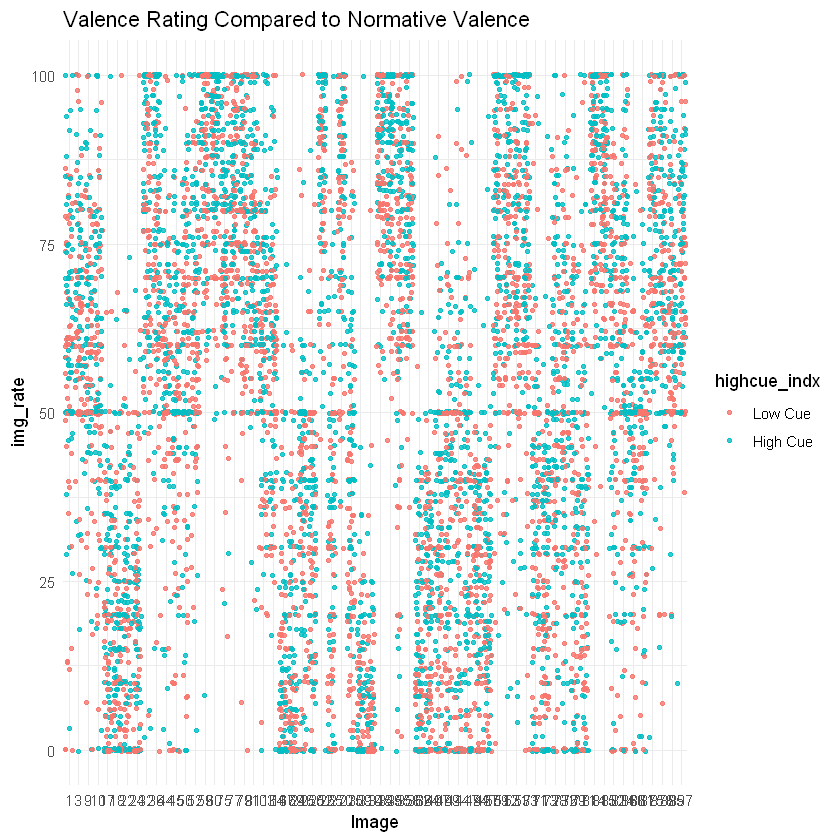

In [3]:
ggplot(data = EEE_data,
    aes(x = cue_observed_mean,
        y = exp_rate,
        # color = val_type))+
        color = highcue_indx))+

  geom_point(size = 1.2,
             alpha = .8,
             position = "jitter")+#  add some random noise for plotting 
  theme_minimal()+
  labs(title = 'Expectation Rating According to Observed Average Rating')

  ggplot(data = EEE_data,
    aes(x = cue_observed_mean,
        y = img_rate,
        # color = val_type))+
        color = highcue_indx))+

  geom_point(size = 1.2,
             alpha = .8,
             position = "jitter")+
  theme_minimal()+
  labs(title = 'Valence Rating According to Observed Average Rating')

ggplot(data = EEE_data,
    aes(x = exp_rate,
        y = img_rate,
        # color = val_type))+
        color = highcue_indx))+
  geom_point(size = 1.2,
             alpha = .8,
             position = "jitter")+
  theme_minimal()+
  labs(title = 'Valence Rating According to Reported Expected Rating')

  ggplot(data = EEE_data,
    aes(x = Valence_mean,
        y = img_rate,
        # color = val_type))+
        color = highcue_indx))+
  geom_point(size = 1.2,
             alpha = .8,
             position = "jitter")+
  theme_minimal()+
  labs(title = 'Valence Rating Compared to Normative Valence')

ggplot(data = EEE_data,
    aes(x = Image,
        y = img_rate,

        color = highcue_indx))+
  geom_point(size = 1.2,
             alpha = .8,
             position = "jitter")+
  theme_minimal()+
  labs(title = 'Valence Rating Compared to Normative Valence')

In [4]:
lmm_model <- lmer(img_rate ~ Valence_mean + highcue_indx + (1 + highcue_indx|Image) + (1|subj), data = EEE_data)
summary(lmm_model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: img_rate ~ Valence_mean + highcue_indx + (1 + highcue_indx |  
    Image) + (1 | subj)
   Data: EEE_data

REML criterion at convergence: 68224.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.2494 -0.5971  0.0200  0.6164  4.7515 

Random effects:
 Groups   Name                 Variance Std.Dev. Corr 
 subj     (Intercept)           27.9928  5.2908       
 Image    (Intercept)           32.6526  5.7142       
          highcue_indxHigh Cue   0.2398  0.4897  -0.87
 Residual                      323.4517 17.9848       
Number of obs: 7872, groups:  subj, 123; Image, 64

Fixed effects:
                     Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)          -7.37960    1.97408 72.62261  -3.738 0.000367 ***
Valence_mean          1.04167    0.03149 62.02720  33.084  < 2e-16 ***
highcue_indxHigh Cue  4.18475    0.41011 61.59099  10.204 7.34e-15 ***
---
Signif. cod

Key Findings:
The normative mean of the image and the type of cue both had large effects on the valence rating reported by participants



In [5]:
lmm_model_matlab <- lmer(img_rate ~ Valence_mean + highcue_indx + (1 + Pair|subj) + (1 + highcue_indx|Image), data = EEE_data)
summary(lmm_model_matlab)

: 

: 

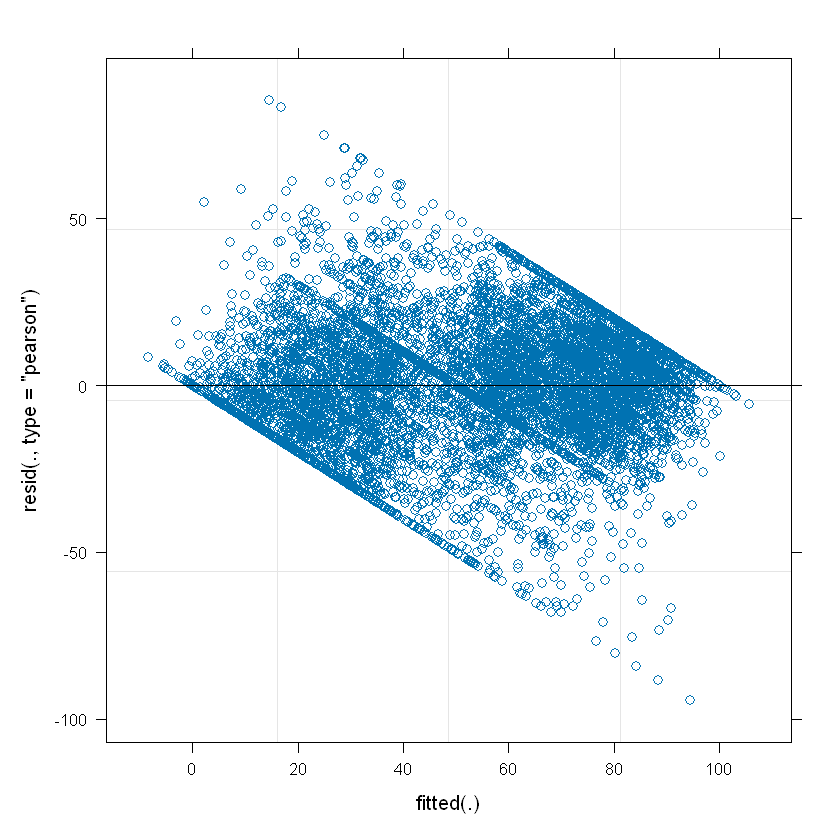

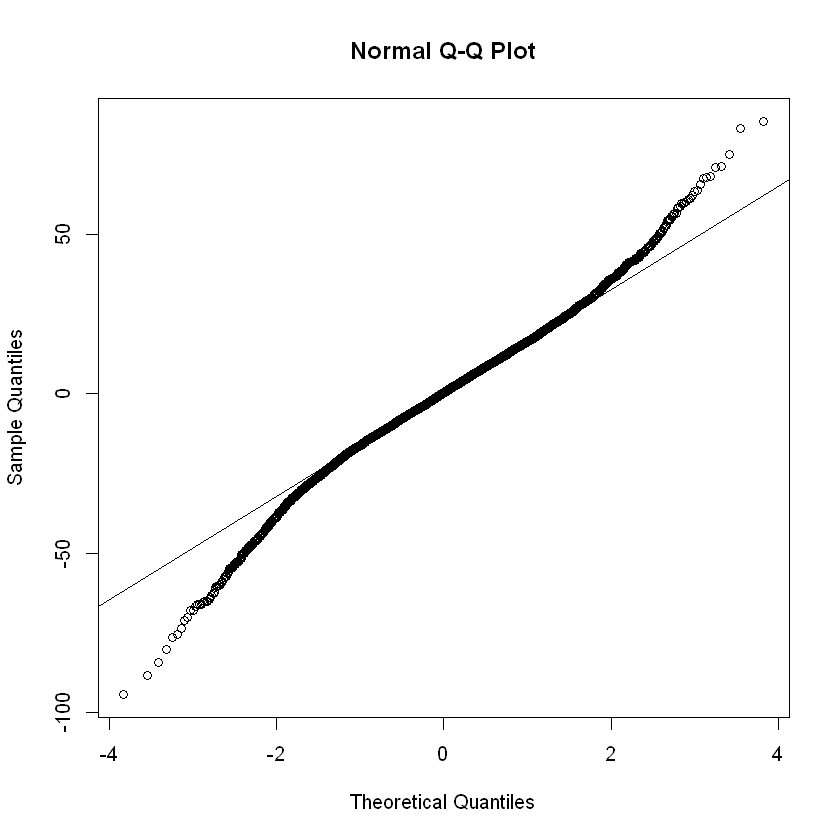

In [ ]:
# Residuals vs. Fitted plot
plot(lmm_model, which = 1)
# plot(lmm_model, which = 2)

# QQ plot
qqnorm(residuals(lmm_model))
qqline(residuals(lmm_model))

# Homoscedasticity plot
# plot(lmm_model, which = 3)